In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [4]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/Cleaned_BA_reviews.csv", index_col=0)
#check wheater index are in order or not
df = df.reset_index(drop=True)

In [5]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified |   Horrible service from boar...      5  2024-09-22   
1  Not Verified |  My wife and I are very disappo...      1  2024-09-13   
2  Not Verified |  We flew BA between Heathrow an...      1  2024-09-13   
3  Not Verified |  Absolutely disgusted with BA. ...      8  2024-09-13   
4  Not Verified | Took a trip to Nashville with m...      1  2024-09-11   

          country  verified                                             corpus  
0         Morocco     False  horrible service boarding landing flew london ...  
1   United States     False  verified wife disappointed flying british airw...  
2       Australia     False  verified flew ba heathrow berlin one way conne...  
3  United Kingdom     False  verified absolutely disgusted ba flight cancel...  
4  United Kingdom     False  verified took trip nashville wife leisure brea...

In [6]:
# We will find out average rating of british airways
df.stars.mean()

4.57408466819222

Text(0.5, 0.98, 'Counts for each rating')

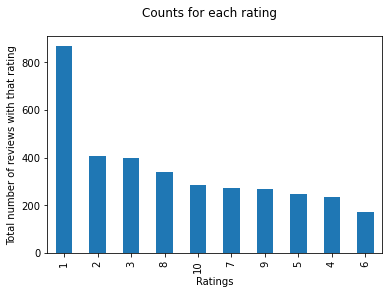

In [8]:
# We will find total count for each rating
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total number of reviews with that rating")
plt.suptitle("Counts for each rating")

In [9]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [10]:
#We need to reset the index since we donot want confusion between index and the rating values
df_ratings = df_ratings.reset_index()

In [11]:
#we need to rename the columns as well
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace = True)


In [12]:
df_ratings

Stars  total_counts  pct_values
0      1           869       24.86
1      2           406       11.61
2      3           399       11.41
3      8           340        9.73
4     10           284        8.12
5      7           273        7.81
6      9           270        7.72
7      5           246        7.04
8      4           236        6.75
9      6           173        4.95

Text(0.5, 1.0, 'Counts for each ratings')

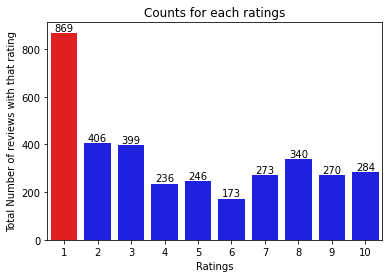

In [13]:
#Now we will create a bar plot to visualize the total number of reviews for each rating, highlights the highest count in red, and label each bar with its corresponding value.
clrs = ['Red' if (x == max(df_ratings.total_counts)) else 'blue' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                 palette=clrs)

ax.bar_label(ax.containers[0])
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [14]:
#we will find unique countires british airways received reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


Text(0.5, 1.0, 'Maximum number of review by country')

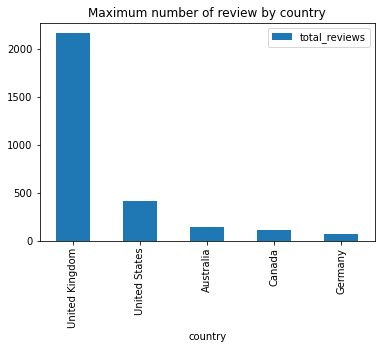

In [15]:
#we will find from which country most reviews came from

df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace = True)
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [16]:
#Now we will find which country provided on average highest ratings?

df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending = False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
print(df_country_rating.columns)


Index(['country', 'avg_rating'], dtype='object')


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

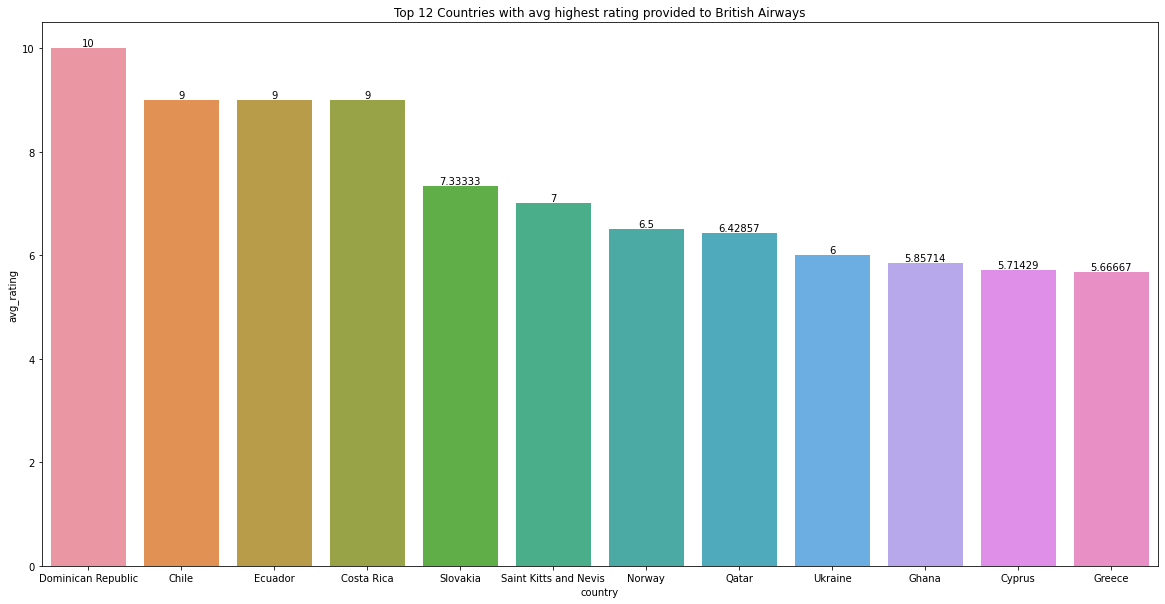

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating.head(12))
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")


In [18]:
#Now we will perform time series analysis

In [19]:
#first we need to convert date datatype to datetime
df.date = pd.to_datetime(df.date)

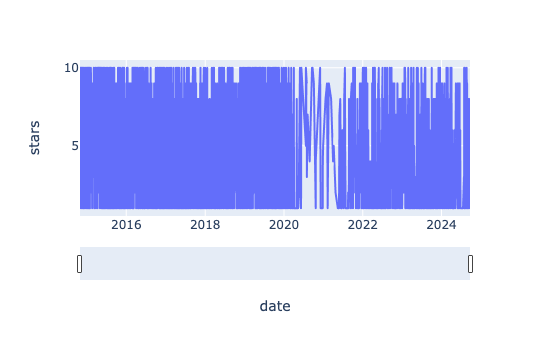

In [20]:
fig = px.line(df, x="date", y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [21]:
#based on the abpve observation we cansee that from april 2020 to aug 2021, there hase been a decline in reviews due to covid peandemic travel restrictions.

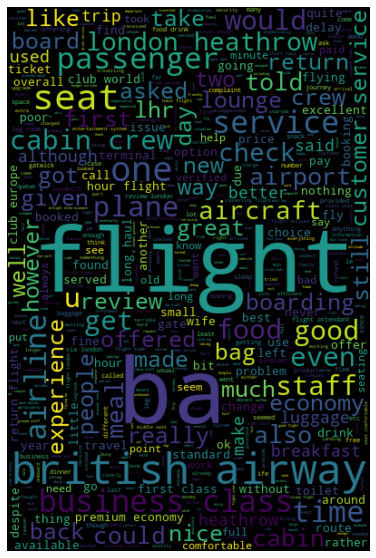

In [24]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('English'))
wordcloud = WordCloud(height=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

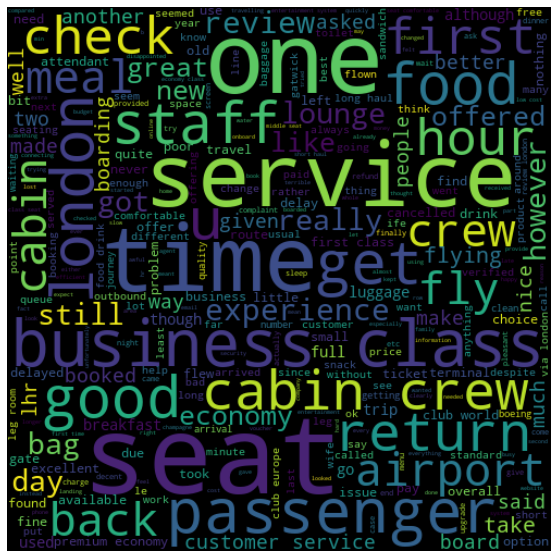

In [27]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])

wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
#word frequency

In [29]:
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(" ")
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])
new_words = [word for word in words if word not in stopwords]
nlp_words = FreqDist(new_words).most_common(20)

all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'boarding')])

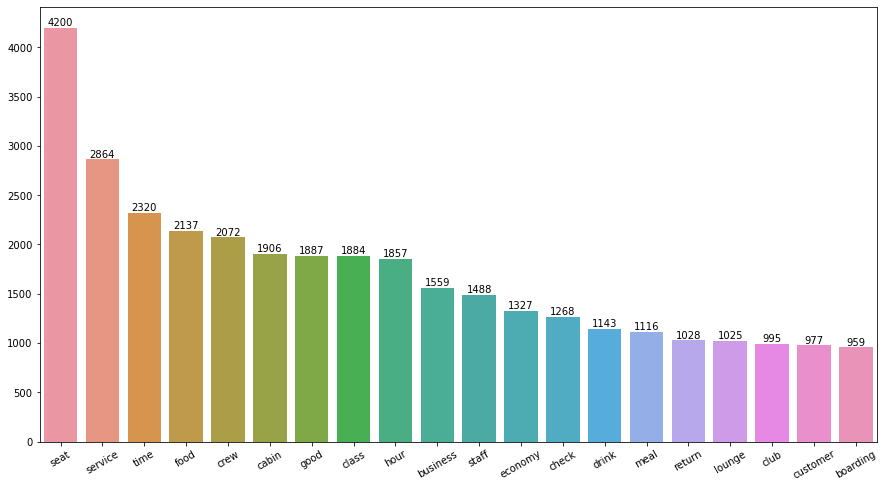

In [32]:
fig, ax = plt.subplots(figsize=(15,8))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

In [33]:
#by above observations we can clearly state that Seat is the most talked topic followed by Service and time which are very important to customers in ternms of service.
#now we need to go in depth to learn about each of these serivces. 
#we will use ngram plots to see if they are bad or good in experience

<AxesSubplot:>

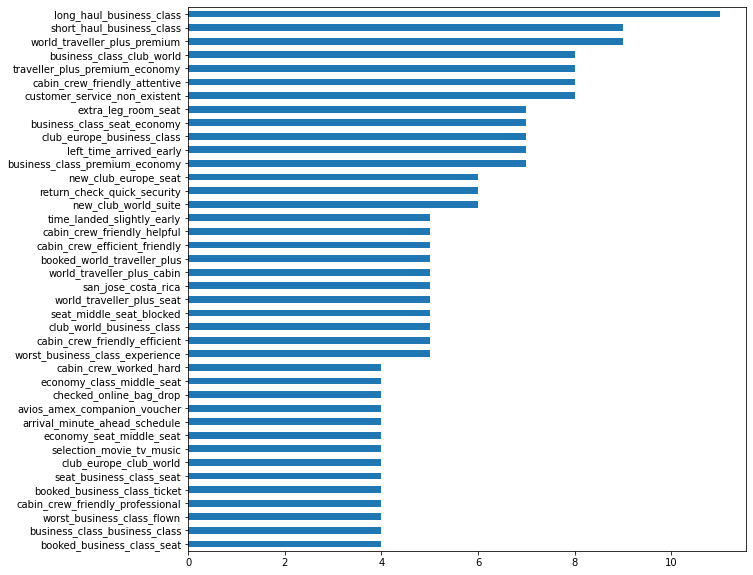

In [36]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
reviews = " ".join(df.corpus)

words = reviews.split(" ")
new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words, number_of_ngrams):
    from nltk import ngrams
    ngrams = ngrams(new_words, number_of_ngrams)
    ngram_fd = FreqDist(ngrams).most_common(40)
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}
    
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words,4)

In [37]:
# we can see that customers are providing good reviews of cabin crew only.
#So another approach we can try is to find word frequencies in which we ca get a better idea. 
#So we will group the reviews based on the raitngs. we will assume 1-3 as bad, 4-6 as average, 7-10 as good

In [38]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<AxesSubplot:>

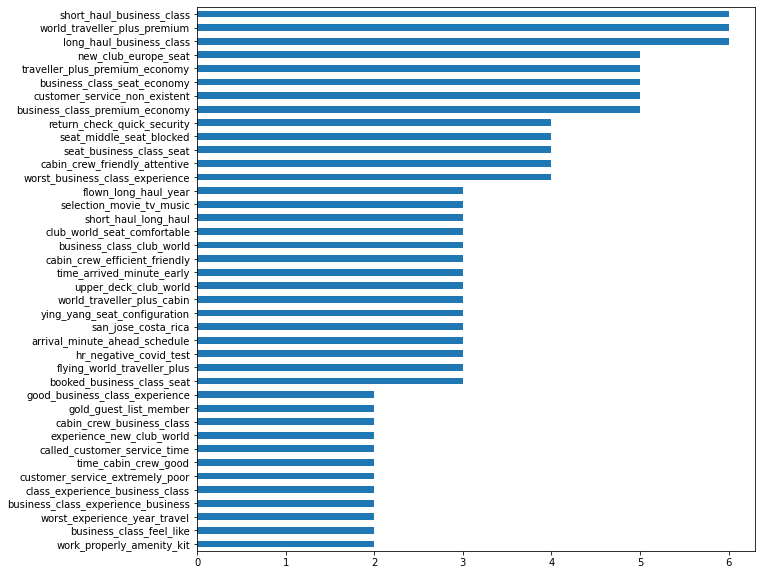

In [41]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#we need to soklit the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

new_words_1_3 = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words_1_3,4)

<AxesSubplot:>

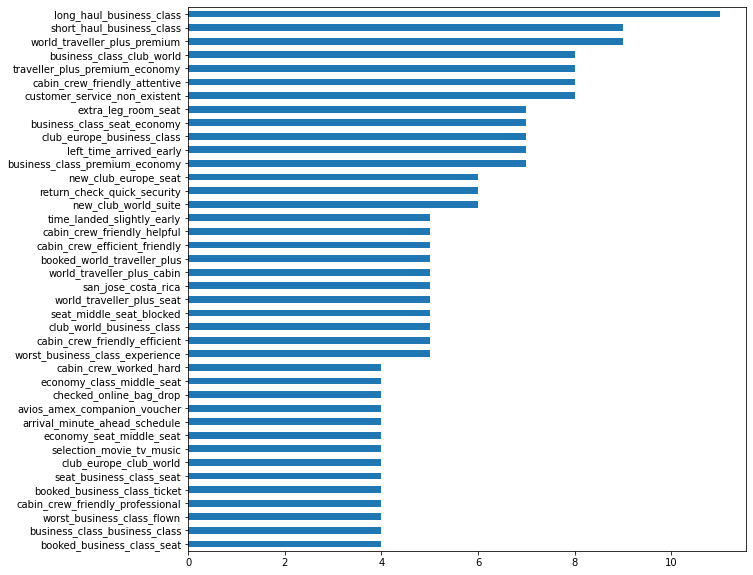

In [42]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words,4)

<AxesSubplot:>

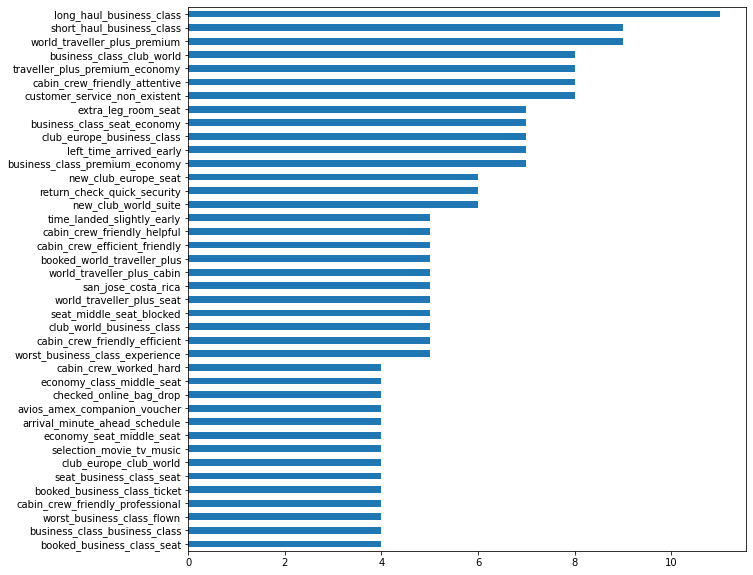

In [43]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words,4)

In [48]:
#we dont know whether the text is positive or negative.
#so we will use textblob library to define if the the text is negative or positive

In [49]:
!pip install textblob

     |████████████████████████████████| 626 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 3.8 MB/s eta 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [51]:

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

df['polarity'] = 0

for i in range(len(df.corpus)):
    sent = TextBlob(df.corpus[i])
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    #df['polarity'][i] = polarity
    df.loc[:, 'polarity'] = 0 

In [54]:
#now we will find how many texts are there with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")
print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

3496 number of reviews between -0.2 and 0.2 polarity score
3496 number of reviews between -0.1 and 0.1 polarity score


In [56]:
#topic modeling with LDA

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names()

/Users/aayushamrute/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [59]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model.fit(tf)

topic_dict = {}
 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [60]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          seat          1774.5        flight          2181.0         class   
1        flight          1345.3            ba          1357.3          food   
2          good           945.1      customer           762.2        flight   
3            ba           836.6       british           760.8            ba   
4          crew           737.7        airway           760.3       service   
5          food           731.2          hour           728.7       airline   
6         cabin           710.5          told           707.1          meal   
7       service           676.5       service           636.5        airway   
8          club           535.9         would           599.7       british   
9          time           446.4           day           595.6      business   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           582.0        airway            14.5        flight           421.7   
1           574.5        mexico            14.3            ba           333.0   
2           565.5       british            12.3          hour           163.2   
3           548.3         milan            10.3      heathrow           112.3   
4           478.8       wedding             9.2          late           111.5   
5           475.2          nice             8.5         delay           111.1   
6           444.8        london             8.3        london           108.5   
7           443.5        infant             7.4          time            89.3   
8           439.7           via             7.3         plane            88.3   
9           402.2          best             6.2     passenger            88.1   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight          1338.1        flight          1771.5            ba   
1          time           448.8            ba          1402.3         plane   
2        london           371.2          seat          1336.1        lounge   
3          hour           364.5       service           840.5          time   
4          crew           320.0         class           718.1         class   
5         cabin           291.0      business           698.0      terminal   
6      heathrow           282.7          crew           584.3        minute   
7       british           280.2          food           581.8     passenger   
8        airway           277.0          time           574.4         check   
9            ba           223.4        lounge           553.8          nice   

  Topic 7 weights  
0            87.0  
1            77.5  
2            70.1  
3            67.6  
4            65.7  
5            58.5  
6            53.1  
7            51.5  
8            48.3  
9            48.2

In [61]:
#from result we can see there are certain words that are not useful to detect the tone of the reviews like ba, flight, passanger , etc

In [62]:
#topic modeling with NMF

In [64]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03261486, 0.0401627 ],
       [0.02525645, 0.01951293],
       [0.08419138, 0.05905407],
       ...,
       [0.05616743, 0.007065  ],
       [0.00411017, 0.14558135],
       [0.00752363, 0.10258117]])

In [66]:
topic_dict = {}

for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)] = ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]

df_topic = pd.DataFrame(topic_dict)

In [67]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            38.9          seat            16.1
1            ba            13.4            ba             9.0
2          hour             9.0         class             7.4
3          time             7.2      business             5.9
4        london             6.6       service             5.8
5        airway             6.3          food             5.7
6       british             6.3         cabin             5.5
7       service             6.1          crew             5.3
8         would             5.4          good             5.0
9           day             4.9       economy             4.4